Importing the necessaries libraries to carry out the project

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pycountry_convert as pc

reading the file and having the first impressions

In [2]:
dataset=pd.read_csv('climate-risk-index-1.csv')
dataset.describe()

,index,cartodb_id,the_geom,the_geom_webmercator,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total
count,182.000000,182.000000,0.0,0.0,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,131.000000,182.000000,182.000000
mean,90.500000,91.500000,NaN,NaN,85.230769,81.791923,78.609890,0.519670,77.626374,86.840659,85.302198,1.517654,85.302198,907.507599
std,52.683014,52.683014,NaN,NaN,44.708529,34.582412,37.858511,3.393934,37.500688,427.350623,44.691600,8.171267,44.691600,4483.998505
min,0.000000,1.000000,NaN,NaN,1.000000,12.170000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000100,1.000000,0.000000
25%,45.250000,46.250000,NaN,NaN,46.250000,52.872500,46.250000,0.000000,46.250000,0.000000,46.250000,0.016500,46.250000,0.000000
50%,90.500000,91.500000,NaN,NaN,91.000000,77.500000,91.500000,0.020000,90.000000,2.000000,91.500000,0.084100,91.500000,30.347000
75%,135.750000,136.750000,NaN,NaN,135.000000,124.500000,114.000000,0.120000,114.000000,22.750000,135.000000,0.275950,135.000000,262.178250
max,181.000000,182.000000,NaN,NaN,135.000000,124.500000,114.000000,43.660000,114.000000,4317.000000,135.000000,77.369400,135.000000,40077.222000


In [3]:
dataset.head()

,index,cartodb_id,the_geom,the_geom_webmercator,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
0,0,1,NaN,NaN,Saudi Arabia,79,72.50,18,0.45,18,140,131,0.0001,119,1.229,SAU,Saudi Arabia
1,1,2,NaN,NaN,Romania,61,61.50,112,0.01,102,1,16,0.6746,11,2797.884,ROU,Romania
2,2,3,NaN,NaN,Spain,69,66.33,74,0.05,47,22,86,0.0394,31,637.070,ESP,Spain
3,3,4,NaN,NaN,Slovenia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SVN,Slovenia
4,4,5,NaN,NaN,South Sudan,133,117.33,114,0.00,114,0,120,0.0021,122,0.508,SSD,South Sudan


Cleaning the data/deleting the unecessary columns

In [4]:
data=dataset.copy()

In [5]:
del data['the_geom']
del data['the_geom_webmercator']

In [6]:
del data['index']

In [7]:
data

,cartodb_id,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
0,1,Saudi Arabia,79,72.50,18,0.45,18,140,131,0.0001,119,1.229,SAU,Saudi Arabia
1,2,Romania,61,61.50,112,0.01,102,1,16,0.6746,11,2797.884,ROU,Romania
2,3,Spain,69,66.33,74,0.05,47,22,86,0.0394,31,637.070,ESP,Spain
3,4,Slovenia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SVN,Slovenia
4,5,South Sudan,133,117.33,114,0.00,114,0,120,0.0021,122,0.508,SSD,South Sudan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,178,Seychelles,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SYC,Seychelles
178,179,Gambia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,GMB,Gambia
179,180,Togo,131,114.33,104,0.01,102,1,123,0.0012,130,0.130,TGO,Togo
180,181,Trinidad and Tobago,135,124.50,114,0.00,114,0,135,NaN,135,0.000,TTO,Trinidad and Tobago


The meaning of the columns:


cri_rank:	Rank of the country on the Climate Risk Index (Integer);


cri_score:	Score of the country on the Climate Risk Index (Integer);


fatalities_per_100k_rank:	Rank of the country in terms of fatalities per 100,000 people (Integer);


fatalities_per_100k_total:	Total number fatalities per 100,000 people (Integer);


fatalities_rank:	Rank of the country in terms of total fatalities (Integer);


fatalities_total:	Total number of fatalities (Integer);


losses_per_gdp__rank:	Rank of the country in terms of losses per GDP (Integer);


losses_per_gdp__total:	Total losses per GDP (Integer);


losses_usdm_ppp_rank:	Rank of the country in terms of losses in USDM PPP (Integer);

losses_usdm_ppp_total:	Total losses in USDM PPP (Integer);


rw_country_code:	Country code (String);


rw_country_name:	Country name (String).

LET'S RENAME THE COLUMNS

In [8]:
data.rename(columns={'cri_rank':'climate_risk_rank',
                     'cri_score':'country_score_rank_climate_risk',
                     'losses_per_gdp__rank':'country_losses_rank_gdp',
                    'losses_per_gdp__total':'country_losses_gdp_total',
                    'rw_country_code':'country_code',
                    'rw_country_name':'country_name'},inplace=True)

In [9]:
data

,cartodb_id,country,climate_risk_rank,country_score_rank_climate_risk,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,country_losses_rank_gdp,country_losses_gdp_total,losses_usdm_ppp_rank,losses_usdm_ppp_total,country_code,country_name
0,1,Saudi Arabia,79,72.50,18,0.45,18,140,131,0.0001,119,1.229,SAU,Saudi Arabia
1,2,Romania,61,61.50,112,0.01,102,1,16,0.6746,11,2797.884,ROU,Romania
2,3,Spain,69,66.33,74,0.05,47,22,86,0.0394,31,637.070,ESP,Spain
3,4,Slovenia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SVN,Slovenia
4,5,South Sudan,133,117.33,114,0.00,114,0,120,0.0021,122,0.508,SSD,South Sudan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,178,Seychelles,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SYC,Seychelles
178,179,Gambia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,GMB,Gambia
179,180,Togo,131,114.33,104,0.01,102,1,123,0.0012,130,0.130,TGO,Togo
180,181,Trinidad and Tobago,135,124.50,114,0.00,114,0,135,NaN,135,0.000,TTO,Trinidad and Tobago


Missing values

In [10]:
col_null_values=[colu for colu  in data.columns if  data[colu].isnull().any()]
col_null_values

['country_losses_gdp_total', 'country_code', 'country_name']

# Notice in country_losses_gdp_total where we have missing values with the exception: country_name
# and country_code, all the other columns have similar values. related to the categorical column, like
# rank, total, etc.

Selecting all rows with NaN values

In [11]:
data[data.isnull().any(axis=1)]

,cartodb_id,country,climate_risk_rank,country_score_rank_climate_risk,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,country_losses_rank_gdp,country_losses_gdp_total,losses_usdm_ppp_rank,losses_usdm_ppp_total,country_code,country_name
3,4,Slovenia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SVN,Slovenia
13,14,Tunisia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,TUN,Tunisia
20,21,Venezuela,135,124.50,114,0.00,114,0,135,NaN,135,0.000,VEN,Venezuela
23,24,United Arab Emirates,127,109.17,86,0.03,85,3,133,NaN,132,0.087,ARE,United Arab Emirates
34,35,Mauritania,135,124.50,114,0.00,114,0,135,NaN,135,0.000,MRT,Mauritania
36,37,Singapore,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SGP,Singapore
37,38,Suriname,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SUR,Suriname
38,39,Azerbaijan,135,124.50,114,0.00,114,0,135,NaN,135,0.000,AZE,Azerbaijan
42,43,Guyana,135,124.50,114,0.00,114,0,135,NaN,135,0.000,GUY,Guyana
52,53,Antigua and Barbuda,135,124.50,114,0.00,114,0,135,NaN,135,0.000,ATG,Antigua and Barbuda


Therefore, we can delete all of it. 

It will not aggregate anything in our analysis, stats, or visualizations.

In [12]:
data=data.dropna()

Let's reset the index

In [13]:
data=data.reset_index()

In [14]:
data

,index,cartodb_id,country,climate_risk_rank,country_score_rank_climate_risk,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,country_losses_rank_gdp,country_losses_gdp_total,losses_usdm_ppp_rank,losses_usdm_ppp_total,country_code,country_name
0,0,1,Saudi Arabia,79,72.50,18,0.45,18,140,131,0.0001,119,1.229,SAU,Saudi Arabia
1,1,2,Romania,61,61.50,112,0.01,102,1,16,0.6746,11,2797.884,ROU,Romania
2,2,3,Spain,69,66.33,74,0.05,47,22,86,0.0394,31,637.070,ESP,Spain
3,4,5,South Sudan,133,117.33,114,0.00,114,0,120,0.0021,122,0.508,SSD,South Sudan
4,5,6,Sierra Leone,102,88.50,42,0.16,68,10,124,0.0011,131,0.114,SLE,Sierra Leone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,168,169,Oman,16,33.33,27,0.31,60,12,28,0.3901,30,654.718,OMN,Oman
125,170,171,Lebanon,78,72.33,26,0.33,54,15,110,0.0080,108,6.651,LBN,Lebanon
126,173,174,Rwanda,110,97.00,60,0.09,68,10,130,0.0001,134,0.025,RWA,Rwanda
127,174,175,Qatar,129,110.33,114,0.00,114,0,113,0.0060,94,19.273,QAT,Qatar


In [15]:
del data['index']
del data['cartodb_id']

In [16]:
data

,country,climate_risk_rank,country_score_rank_climate_risk,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,country_losses_rank_gdp,country_losses_gdp_total,losses_usdm_ppp_rank,losses_usdm_ppp_total,country_code,country_name
0,Saudi Arabia,79,72.50,18,0.45,18,140,131,0.0001,119,1.229,SAU,Saudi Arabia
1,Romania,61,61.50,112,0.01,102,1,16,0.6746,11,2797.884,ROU,Romania
2,Spain,69,66.33,74,0.05,47,22,86,0.0394,31,637.070,ESP,Spain
3,South Sudan,133,117.33,114,0.00,114,0,120,0.0021,122,0.508,SSD,South Sudan
4,Sierra Leone,102,88.50,42,0.16,68,10,124,0.0011,131,0.114,SLE,Sierra Leone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Oman,16,33.33,27,0.31,60,12,28,0.3901,30,654.718,OMN,Oman
125,Lebanon,78,72.33,26,0.33,54,15,110,0.0080,108,6.651,LBN,Lebanon
126,Rwanda,110,97.00,60,0.09,68,10,130,0.0001,134,0.025,RWA,Rwanda
127,Qatar,129,110.33,114,0.00,114,0,113,0.0060,94,19.273,QAT,Qatar


The columns: country and country_name are equal.

Let's delete country_name.

In [17]:
del data['country_name']

In [18]:
data

,country,climate_risk_rank,country_score_rank_climate_risk,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,country_losses_rank_gdp,country_losses_gdp_total,losses_usdm_ppp_rank,losses_usdm_ppp_total,country_code
0,Saudi Arabia,79,72.50,18,0.45,18,140,131,0.0001,119,1.229,SAU
1,Romania,61,61.50,112,0.01,102,1,16,0.6746,11,2797.884,ROU
2,Spain,69,66.33,74,0.05,47,22,86,0.0394,31,637.070,ESP
3,South Sudan,133,117.33,114,0.00,114,0,120,0.0021,122,0.508,SSD
4,Sierra Leone,102,88.50,42,0.16,68,10,124,0.0011,131,0.114,SLE
...,...,...,...,...,...,...,...,...,...,...,...,...
124,Oman,16,33.33,27,0.31,60,12,28,0.3901,30,654.718,OMN
125,Lebanon,78,72.33,26,0.33,54,15,110,0.0080,108,6.651,LBN
126,Rwanda,110,97.00,60,0.09,68,10,130,0.0001,134,0.025,RWA
127,Qatar,129,110.33,114,0.00,114,0,113,0.0060,94,19.273,QAT


Map with all countries and their risk rank

Let's take the dataframe and insert into an excel file

In [19]:
countries=data[['country','climate_risk_rank']]
ten=countries.sort_values(by='climate_risk_rank',ascending=False)

In [21]:
with pd.ExcelWriter('climate_risk_rank.xlsx',
                    mode='a') as writer:  
    ten.to_excel(writer, sheet_name='risk_rank_all_countries')

WORLD MAP

# The world map contains just the countries with a record of data

![Alt text](world_map.png)

TOP 10- countries

![Alt text](rank_climate_risk.png)

Correlation-map

In [21]:
correlation_features=data[['climate_risk_rank','country_score_rank_climate_risk',
                           	'fatalities_per_100k_rank','fatalities_per_100k_total',
                            'fatalities_rank','fatalities_total',
                            'losses_usdm_ppp_rank',	
                            'losses_usdm_ppp_total']]

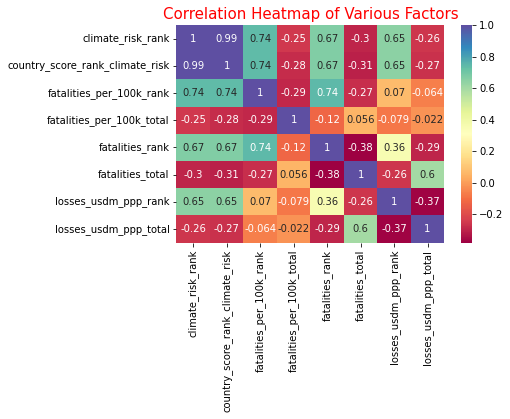

In [22]:
def PlottingChart():
    sns.heatmap(correlation_features.corr(), cmap="Spectral", annot=True)
    plt.title("Correlation Heatmap of Various Factors", size=15, c="red")
    plt.show()

PlottingChart()    # Visualizing data...

INTUITIONS

# Country_score_climate_risk and climate_risk_rank have 0.99 of coeficient correlated. 
# The countries' losses and fatalities_rank are very correlated with climate risk.

Now, let's use as approach a linear regression model with the variables:

Independent: country_score_rank_climate_risk;

dependent: fatalities_per_100k_rank.

In a linear regression model we use x to predict y, thus:

independent: x

dependent: y

In [23]:
x=np.array(data.country_score_rank_climate_risk)
y=np.array(data.fatalities_per_100k_rank)


In [24]:
Y=y.reshape(-1,1)
X=x.reshape(-1,1)

In [25]:
model=LinearRegression().fit(X,Y)

Score;

Intercept;

slope.

In [26]:
print(f'Coefficient of determination:{round(model.score(X,Y)*100,2)}%')

Coefficient of determination:54.76%


In [27]:
print(f'Intercept:{model.intercept_}')

Intercept:[-2.18971142]


In [28]:
print(f'slope:{model.coef_}')

slope:[[1.0248752]]


PPP_Rank - 20 first 

In [29]:
ppp_data=data[['country','losses_usdm_ppp_rank']]
ppp_rank=ppp_data.sort_values(by='losses_usdm_ppp_rank',ascending=False).iloc[0:10]

<AxesSubplot:title={'center':"Top 10 countries'- losses_usdm"}, xlabel='losses_usdm_ppp_rank', ylabel='country'>

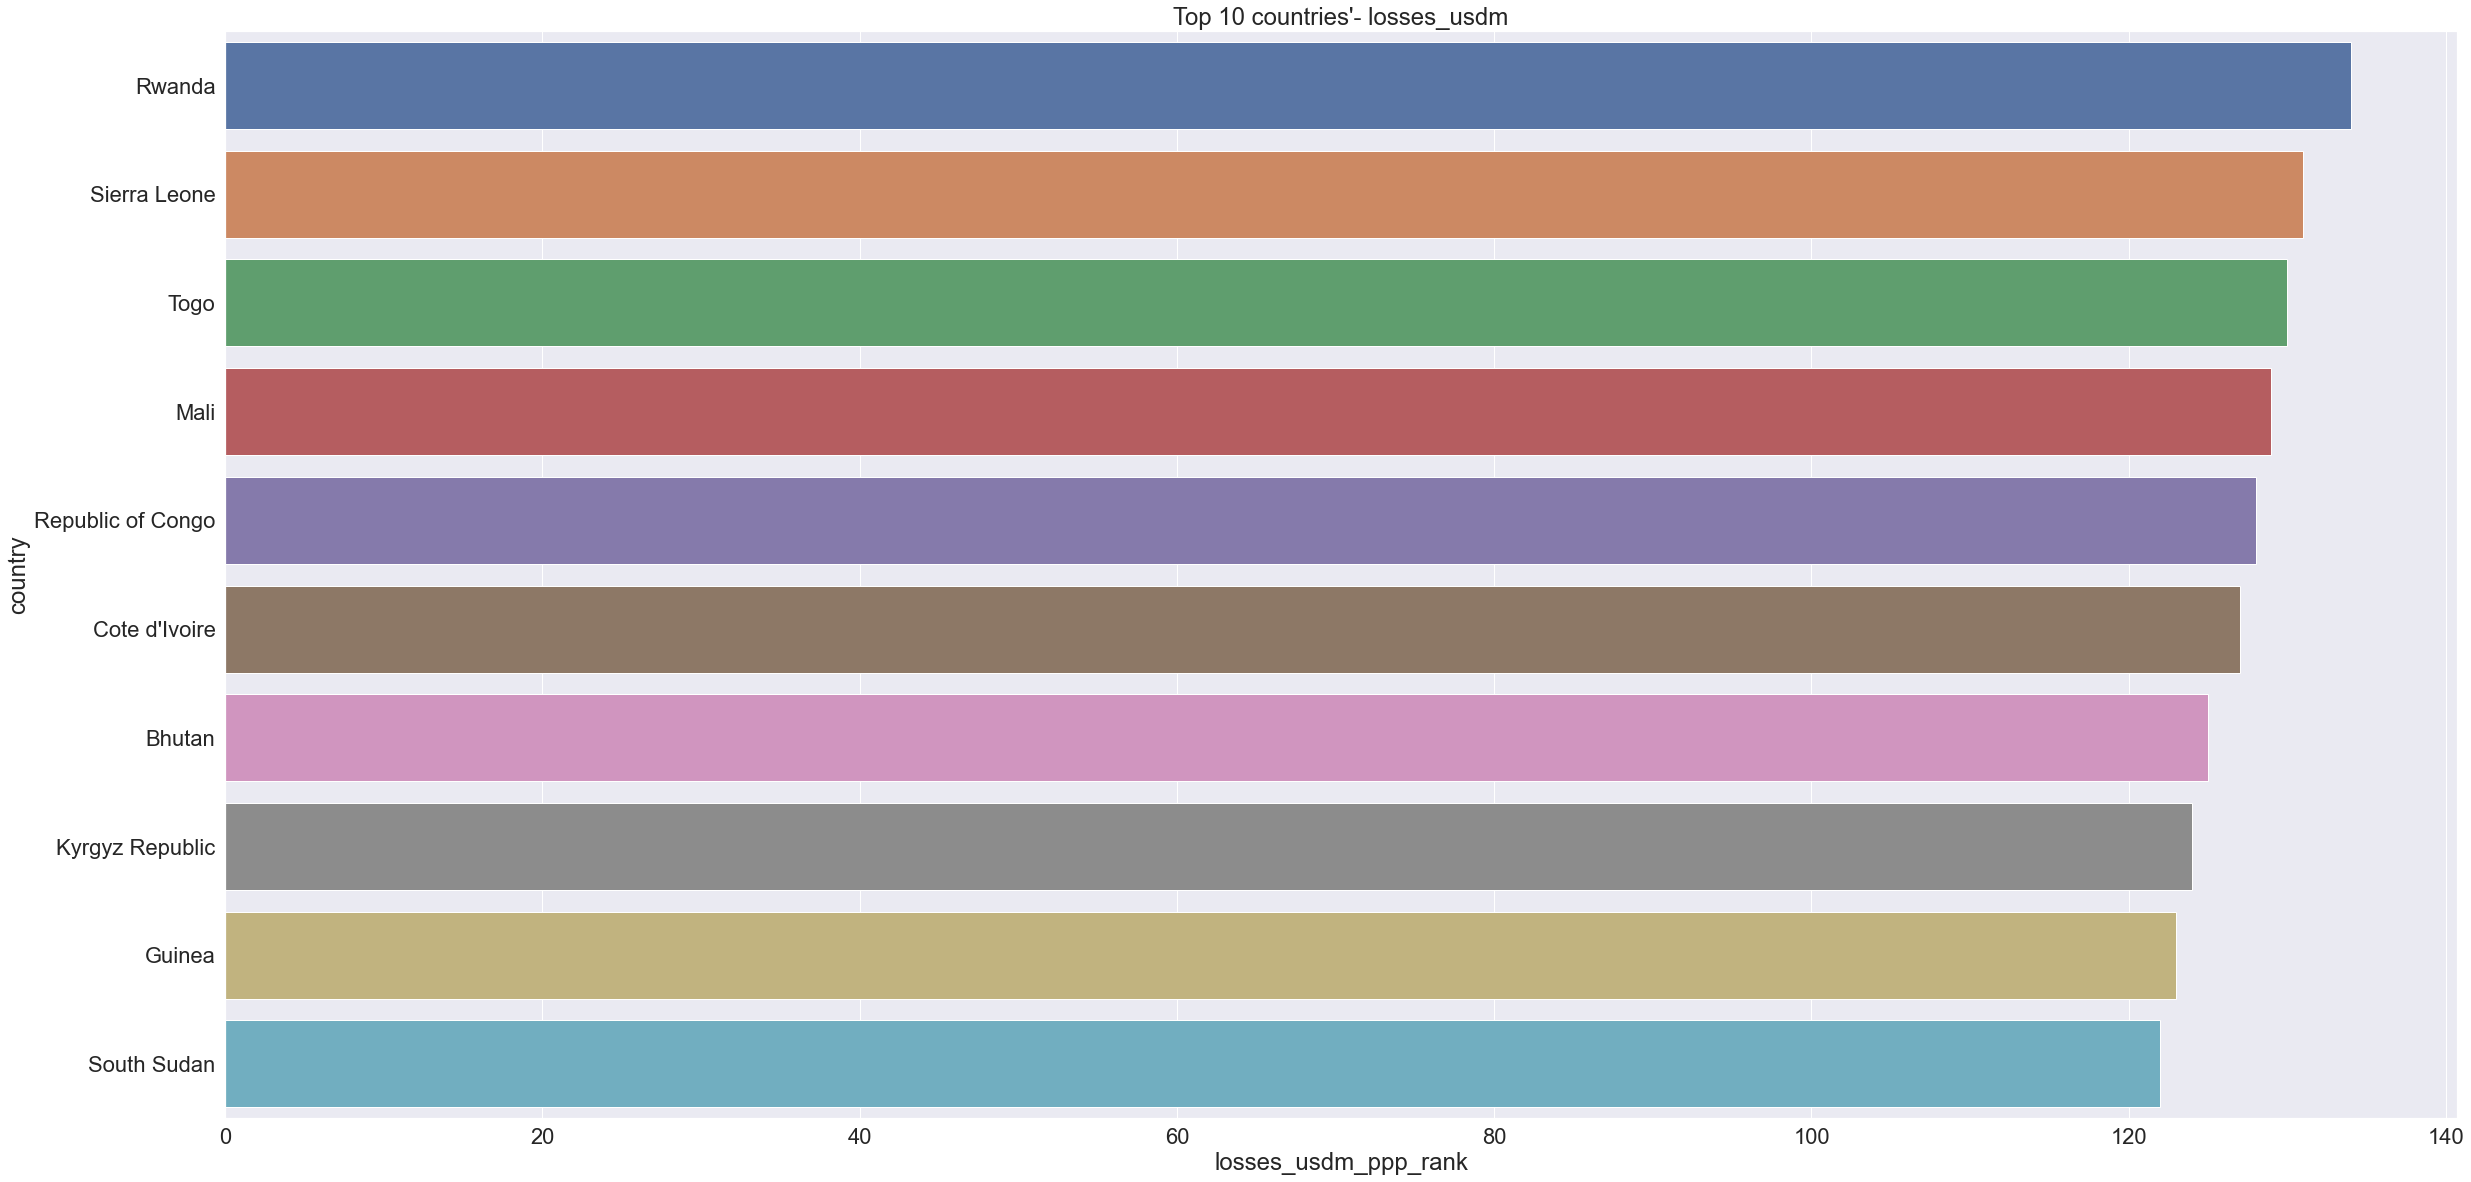

In [99]:
sns.set_palette(sns.color_palette("Paired"))
plt.figure(figsize=(40,20))
plt.title("Top 10 countries'- losses_usdm")
sns.set(font_scale=5)
sns.barplot(x=ppp_rank.losses_usdm_ppp_rank,y=ppp_rank.country)


Let's watch the data from other perspective--Continents

# We will build a function that executes a command to return the continent based on country.


In [31]:
pd.set_option('display.max_rows',data.shape[0]+1)

In [32]:
data['country'][13]

'The Bahamas'

In [33]:
data

,country,climate_risk_rank,country_score_rank_climate_risk,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,country_losses_rank_gdp,country_losses_gdp_total,losses_usdm_ppp_rank,losses_usdm_ppp_total,country_code
0,Saudi Arabia,79,72.50,18,0.45,18,140,131,0.0001,119,1.229,SAU
1,Romania,61,61.50,112,0.01,102,1,16,0.6746,11,2797.884,ROU
2,Spain,69,66.33,74,0.05,47,22,86,0.0394,31,637.070,ESP
3,South Sudan,133,117.33,114,0.00,114,0,120,0.0021,122,0.508,SSD
4,Sierra Leone,102,88.50,42,0.16,68,10,124,0.0011,131,0.114,SLE
5,South Africa,33,45.67,84,0.03,51,19,24,0.4722,7,3427.958,ZAF
6,Serbia,83,75.50,114,0.00,114,0,33,0.2794,45,272.927,SRB
7,Slovak Republic,123,105.33,97,0.02,102,1,115,0.0046,106,7.468,SVK
8,Solomon Islands,89,76.83,39,0.17,102,1,80,0.0445,121,0.511,SLB
9,Swaziland,128,109.33,114,0.00,114,0,98,0.0174,118,1.890,SWZ


In [35]:
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name


In [36]:
data['country'] = data['country'].replace(
    ["The Bahamas", "Cote d'Ivoire",
     'Democratic Republic of Congo',"Lao People’s Democratic Republic",
     'Republic of Congo','Former Yugoslav Republic of Macedonia'], 
                                          ['Bahamas', "Côte d'Ivoire",
                                           'Democratic Republic of the Congo',
                                           'Laos','Republic of the Congo','North Macedonia'])

# I've replaced the name above because they will cause trouble for our function.

In [37]:
continents=[]
for i in data['country']:
    continents.append(country_to_continent(i))

In [38]:
data['continents']=continents

In [55]:
fig = px.scatter(data, x=data['country_score_rank_climate_risk'], 
                 y=data['climate_risk_rank'], size="country_score_rank_climate_risk", 
                 color="continents",
           hover_name="country", log_x=True,size_max=60)
fig.show()


# Alright, how about the continents?

Perspective-continents

In [98]:

fig = px.scatter(data, x=data['country_score_rank_climate_risk'], y=data['climate_risk_rank'], animation_group="country",
           size="country_score_rank_climate_risk", color="continents", hover_name="country", facet_col="continents",
           log_x=True, size_max=25, range_x=[1,133], range_y=[1,133],title='Continents perspectives-climate risk')
fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    font_size=12,
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green"
)
fig.show()

Feel free to create other similar views.